Testing
https://pytorch.org/audio/main/tutorials/audio_data_augmentation_tutorial.html

In [1]:
import torch
import torchaudio
import torchaudio.functional as F

import math

from IPython.display import Audio
import matplotlib.pyplot as plt
import os
from torchaudio.utils import download_asset

print(torch.__version__)
print(torchaudio.__version__)

2.0.1+cu117
2.0.2+cu117


In [2]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

In [3]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

In [4]:
speech_fpath = "audio/speech/"
speech_clips = os.listdir(speech_fpath)
noise_fpath = "audio/noise/"
noise_clips = os.listdir(noise_fpath)
print("No. of .wav files in speech folder = ",len(speech_clips))
print("No. of .wav files in noise folder = ",len(noise_clips))

No. of .wav files in speech folder =  10
No. of .wav files in noise folder =  10


In [5]:
waveform1, sample_rate1 = torchaudio.load(speech_fpath + speech_clips[0])
waveform2, sample_rate2 = torchaudio.load(noise_fpath + noise_clips[0])

In [41]:
import random
speech, _ = torchaudio.load(speech_fpath + speech_clips[0])
noise, _ = torchaudio.load(noise_fpath + noise_clips[0])
print(noise.shape[1])
print(speech.shape[1])
first = random.randint(0, noise.shape[1] - speech.shape[1])
print(first)
print(noise[:, first:first + speech.shape[1]])


4800064
52013
2864308
tensor([[0.0075, 0.0081, 0.0090,  ..., 0.0504, 0.0438, 0.0389]])
52013


In [ ]:
noise = noise[:, first:first + speech.shape[1]]

print(noise.shape[1])

snr_dbs = torch.tensor([-3, -6, -9])
noisy_speeches = F.add_noise(speech, noise, snr_dbs)

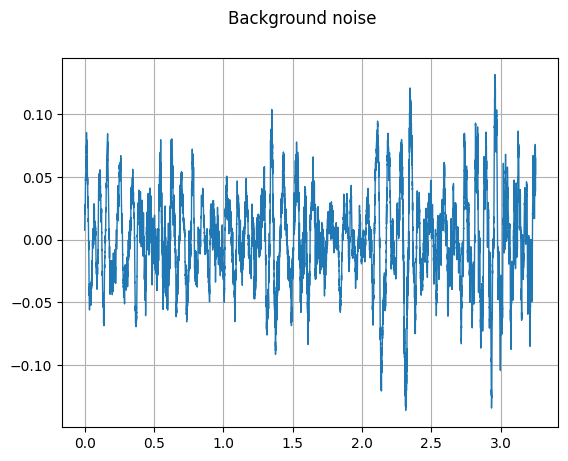

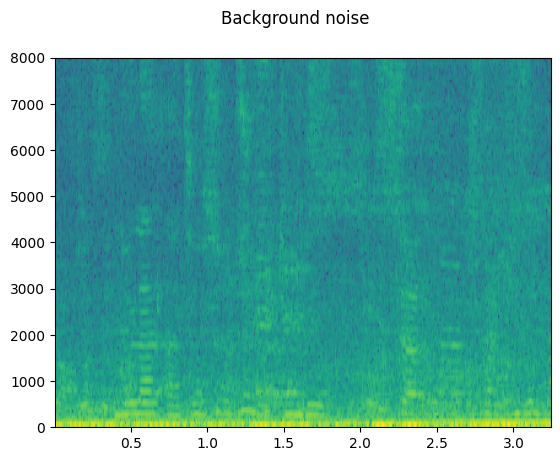

In [42]:
plot_waveform(noise, sample_rate1, title="Background noise")
plot_specgram(noise, sample_rate1, title="Background noise")
Audio(noise, rate=sample_rate1)

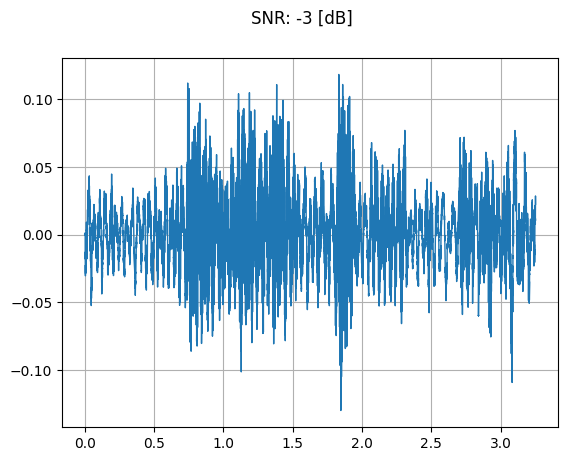

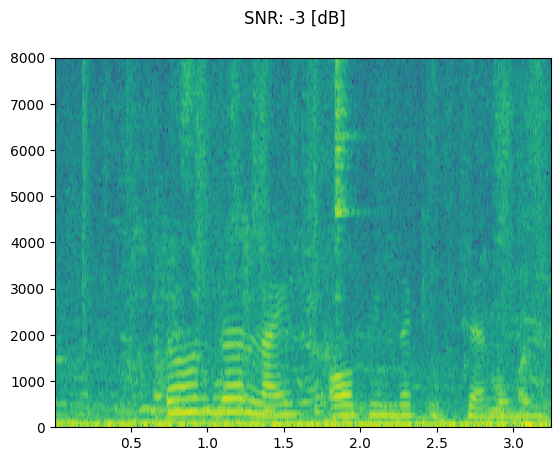

In [8]:
snr_db, noisy_speech = snr_dbs[0], noisy_speeches[0:1]
plot_waveform(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
plot_specgram(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
Audio(noisy_speech, rate=sample_rate1)

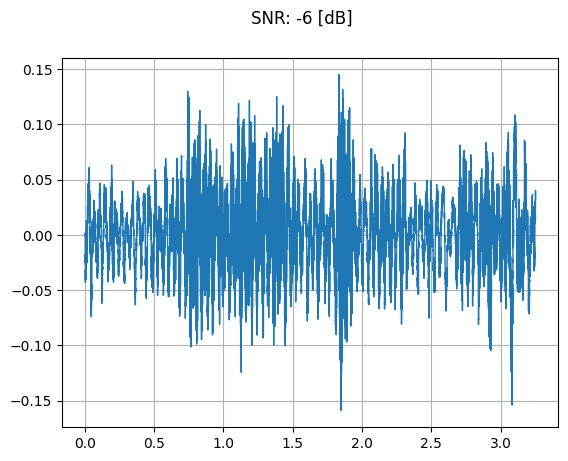

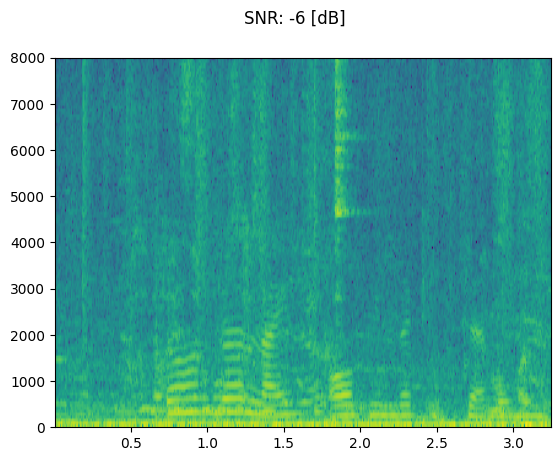

In [9]:
snr_db, noisy_speech = snr_dbs[1], noisy_speeches[1:2]
plot_waveform(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
plot_specgram(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
Audio(noisy_speech, rate=sample_rate1)

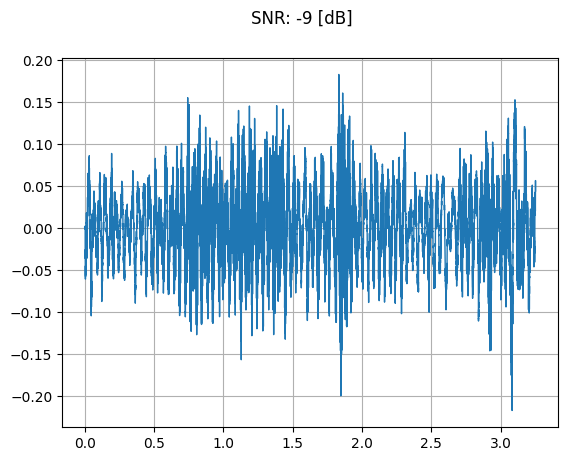

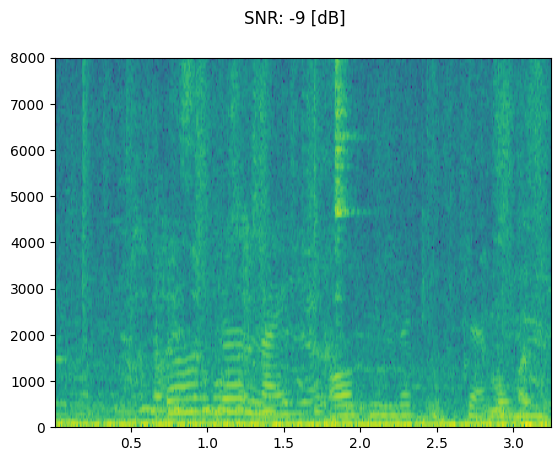

In [10]:
snr_db, noisy_speech = snr_dbs[2], noisy_speeches[2:3]
plot_waveform(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
plot_specgram(noisy_speech, sample_rate1, title=f"SNR: {snr_db} [dB]")
Audio(noisy_speech, rate=sample_rate1)

https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html

In [15]:
def inspect_file(path):
  print("-" * 10)
  print("Source:", path)
  print("-" * 10)
  print(f" - File size: {os.path.getsize(path)} bytes")
  print(f" - {torchaudio.info(path)}")

In [12]:
path = "save_test.wav"
torchaudio.save(path, noisy_speech, sample_rate1)
inspect_file(path)

----------
Source: save_test.wav
----------
 - File size: 208132 bytes
 - AudioMetaData(sample_rate=16000, num_frames=52013, num_channels=1, bits_per_sample=32, encoding=PCM_F)


In [2]:
speech_fpath = "audio/speech/"
speech_clips = os.listdir(speech_fpath)
noise_fpath = "audio/noise/"
noise_clips = os.listdir(noise_fpath)
print("No. of .wav files in speech folder = ",len(speech_clips))
print("No. of .wav files in noise folder = ",len(noise_clips))

No. of .wav files in speech folder =  50
No. of .wav files in noise folder =  50


In [3]:
#Randomise speech files can not be used twice
import random
speech_ran_list = random.sample(range(len(speech_clips)), len(speech_clips))
print(speech_ran_list)

for i in range(0, len(speech_clips)):
    os.rename(speech_fpath + speech_clips[i], speech_fpath + str(speech_ran_list[i]) + "_speech.wav")


[26, 25, 12, 7, 5, 38, 45, 29, 21, 17, 8, 44, 0, 20, 33, 34, 15, 36, 1, 4, 49, 18, 30, 41, 48, 46, 24, 35, 6, 10, 39, 14, 11, 42, 22, 27, 19, 23, 3, 47, 43, 31, 32, 16, 28, 40, 13, 9, 37, 2]


In [2]:
from scipy.io import wavfile
import math
import numpy as np
from scipy import signal
from pathlib import Path
import scipy.signal as sps
from scipy.signal import butter, lfilter
import soundfile as sf
import matplotlib.pyplot as plt
import pydub
import uuid
import os
from pydub import AudioSegment, effects

c:\Users\Edward\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
test_speech_fpath = "audio/test_speech/"
test_speech_clips = os.listdir(test_speech_fpath)
test_noise_fpath = "audio/test_noise/"
test_noise_clips = os.listdir(test_noise_fpath)
print("No. of .wav files in test speech folder = ",len(test_speech_clips))
print("No. of .wav files in test noise folder = ",len(test_noise_clips))

No. of .wav files in test speech folder =  0
No. of .wav files in test noise folder =  0


In [5]:
speech_fpath = "audio/speech/"
speech_clips = os.listdir(speech_fpath)
noise_fpath = "audio/noise/"
noise_clips = os.listdir(noise_fpath)
print("No. of .wav files in speech folder = ",len(speech_clips))
print("No. of .wav files in noise folder = ",len(noise_clips))

No. of .wav files in speech folder =  50
No. of .wav files in noise folder =  50


In [6]:
for i in range (0, len(speech_clips)):
   samplerate, data = wavfile.read(speech_fpath + speech_clips[i])
   Fs1 = samplerate
   Fs2 = 16000
   N = len(data)
   total_time = (N-1)/Fs1
   Max_Signal_Frequency =Fs2/2
   New_sample_amount = math.ceil(Fs2*total_time)
   Single_Channel = np.zeros(New_sample_amount)
   data = data/(2**(15-1))
   Original_signal = data
   Anti_Aliased_signal = np.array(butter_lowpass_filter(Original_signal,Max_Signal_Frequency,Fs1))
   Down_sampled_signal = np.array(sps.resample(Anti_Aliased_signal,New_sample_amount))
   Single_Channel = Down_sampled_signal
   Transformed_single_channel = Single_Channel.transpose()
   sf.write(test_speech_fpath + "speech_" + str(i) +".wav", Transformed_single_channel, Fs2, 'PCM_16')
   rawsound = AudioSegment.from_wav(test_speech_fpath + "speech_" + str(i) +".wav")  
   normalizedsound = effects.normalize(rawsound)  
   normalizedsound.export(test_speech_fpath + "speech_" + str(i) +".wav", format = 'wav')
   

In [7]:
for i in range (0, len(noise_clips)):
   rawsound = AudioSegment.from_wav(noise_fpath + noise_clips[i])  
   normalizedsound = effects.normalize(rawsound)  
   normalizedsound.export(test_noise_fpath + "noise_" + str(i) +".wav", format = 'wav')

In [8]:
#Randomise noise files can one be done once
import random
noise_ran_list = random.sample(range(len(test_noise_clips)), len(test_noise_clips))
print(noise_ran_list)

for i in range(0, len(test_noise_clips)):
    os.rename(test_noise_fpath + test_noise_clips[i], test_noise_fpath + str(noise_ran_list[i]) + "_noise.wav")


[]


In [12]:
speech_fpath = "audio/speech/"
speech_clips = os.listdir(speech_fpath)
noise_fpath = "audio/noise/"
noise_clips = os.listdir(noise_fpath)
test_speech_fpath = "audio/test_speech/"
test_speech_clips = os.listdir(test_speech_fpath)
print("No. of .wav files in speech folder = ",len(test_speech_clips))
print("No. of .wav files in speech folder = ",len(speech_clips))
print("No. of .wav files in noise folder = ",len(noise_clips))

No. of .wav files in speech folder =  50
No. of .wav files in speech folder =  50
No. of .wav files in noise folder =  50


In [13]:
# Adding all noise and speech together at different SNR levels

for i in range(0, len(speech_clips)):
  waveform1, sample_rate1 = torchaudio.load(test_speech_fpath + test_speech_clips[i])
  waveform2, sample_rate2 = torchaudio.load(noise_fpath + noise_clips[i])

  speech, _ = torchaudio.load(test_speech_fpath + test_speech_clips[i])
  noise, _ = torchaudio.load(noise_fpath + noise_clips[i])

  first = random.randint(0, noise.shape[1] - speech.shape[1])
  noise = noise[:, first:first + speech.shape[1]]

  snr_dbs = torch.tensor([-3, -6, -9])
  noisy_speeches = F.add_noise(speech, noise, snr_dbs)

  snr_db, noisy_speech = snr_dbs[0], noisy_speeches[0:1]
  torchaudio.save("audio/noisy_speech/SNR_-3/" + "SNR_-3dB_" + str(i) + ".wav", noisy_speech, sample_rate1)

  snr_db, noisy_speech = snr_dbs[1], noisy_speeches[1:2]
  torchaudio.save("audio/noisy_speech/SNR_-6/" + "SNR_-6dB_" + str(i) + ".wav", noisy_speech, sample_rate1)

  snr_db, noisy_speech = snr_dbs[2], noisy_speeches[2:3]
  torchaudio.save("audio/noisy_speech/SNR_-9/" + "SNR_-9dB_" + str(i) + ".wav", noisy_speech, sample_rate1)

In [22]:
path = "audio/noise/3_noise.wav"
inspect_file(path)

----------
Source: audio/noise/3_noise.wav
----------
 - File size: 9600172 bytes
 - AudioMetaData(sample_rate=16000, num_frames=4800064, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [23]:
path = "audio/noisy_speech/SNR_-3/" + "SNR_-3dB_" + str(0) + ".wav"
inspect_file(path)

----------
Source: audio/noisy_speech/SNR_-3/SNR_-3dB_0.wav
----------
 - File size: 172192 bytes
 - AudioMetaData(sample_rate=16000, num_frames=43028, num_channels=1, bits_per_sample=32, encoding=PCM_F)


- Check the downsampling
- different snrs = different speech.

In [25]:
samplerate, data = wavfile.read("audio/noisy_speech/SNR_-3/" + "SNR_-3dB_" + str(0) + ".wav")
print(data)

[ 0.1966405   0.1292044  -0.04913546 ...  0.08847199  0.11652476
  0.05282602]


C:\Users\Edward\AppData\Local\Temp\ipykernel_14712\3475335720.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read("audio/noisy_speech/SNR_-3/" + "SNR_-3dB_" + str(0) + ".wav")


In [26]:
samplerate, data = wavfile.read("audio/noise/3_noise.wav")
print(data)

[ 0  0  0 ... 33 42 34]
